In [1]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 13.2 MB/s eta 0:00:01
  Created wheel for folium: file

In [2]:
pip install beautifulsoup4

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import itertools

In [4]:
URL = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto'
page = requests.get(URL)

In [5]:
soup=BeautifulSoup(page.content, 'html.parser')

In [6]:
Tables= soup.findAll('table',{"class":"wikitable sortable"})

In [7]:
Col=[]
Rows=Tables[0].find_all('tr')
for row in range(len(Rows)):
    column=Rows[row].find_all('td')
    try:
        if str(column[1])!="<None></None>":
            Col.append(column[1].text.split(", "))
#             Links=column[1].find_all('a')
#             for link in range(len(Links)):
#                 Col.append(Links[link].text)
    except:
        print("warning")
        


warning


In [8]:
Neighborhoods=list(itertools.chain.from_iterable(Col))
for elements in range(len(Neighborhoods)):
    Neighborhoods[elements]=Neighborhoods[elements].strip('\n')
    Neighborhoods[elements]=Neighborhoods[elements].strip('\t')

In [9]:
Neighborhoods

['Downtown',
 'Harbourfront',
 'Little Italy',
 'Little Portugal',
 'Dufferin Grove',
 'Palmerston',
 'University',
 'Bay Street Corridor',
 'Kensington Market',
 'Chinatown',
 'Trinity Bellwoods',
 'South Niagara',
 'Island airport',
 'The Islands',
 'waterfront communities C1',
 "Queen's Park",
 'Ontario Provincial Government',
 'Victoria Hotel',
 'Central Bay Street',
 'First Canadian Place',
 'Design Exchange',
 'Adelaide',
 'University of Toronto',
 'Union Station',
 'The Annex',
 'Yorkville',
 'South Hill',
 'Summerhill',
 'Wychwood Park',
 'Deer Park',
 'Casa Loma',
 'Forest Hill South',
 'Oakwood–Vaughan',
 'Humewood–Cedarvale',
 'Corso Italia',
 'Forest Hill Road Park',
 'Bedford Park',
 'Lawrence Manor',
 'North Toronto',
 'Forest Hill North',
 'Lawrence Park',
 'Lawrence Heights',
 'Roselawn',
 'North York',
 'Clanton Park',
 'Bathurst Manor',
 'Willowdale West',
 'Newtonbrook West',
 'Westminster–Branson',
 'Lansing-Westgate',
 'Cabbagetown',
 'St. Lawrence Market',
 'Toron

In [10]:
#Getting coordinates of the neighborhoods

In [11]:
geolocator = Nominatim(user_agent="torronto_explorer")

In [12]:
neighborhood_df= pd.DataFrame(columns=['neighborhood', 'latitude', 'longitude'])

In [13]:
for row in range(len(Neighborhoods)):
    address="Canada Toronto "+ Neighborhoods[row]
    location= geolocator.geocode(address)
    try:
        neighborhood_df=neighborhood_df.append({'neighborhood': Neighborhoods[row], 'latitude': location.latitude, 'longitude': location.longitude }, ignore_index=True)
    except:
        print('warning, could not find '+ address)
print('A total of ' + str(neighborhood_df.shape[0]/len(Neighborhoods)) + ' of all neighborhoods listed in wikipedia were found.')

warning, could not find Canada Toronto Bay Street Corridor
warning, could not find Canada Toronto waterfront communities C1
warning, could not find Canada Toronto Ontario Provincial Government
warning, could not find Canada Toronto Westminster–Branson
warning, could not find Canada Toronto Parkwoods–Donalda
warning, could not find Canada Toronto Blake-Jones
warning, could not find Canada Toronto South Central Letter Processing Plant Toronto
warning, could not find Canada Toronto Broadview North (Old East York)
warning, could not find Canada Toronto Tam O'Shanter – Sullivan
warning, could not find Canada Toronto Eglinton East (Knob Hill)
warning, could not find Canada Toronto Bendale (Cedarbrae)
warning, could not find Canada Toronto Port Union (Centennial Scarborough)
warning, could not find Canada Toronto The Junction (Junction Area)
warning, could not find Canada Toronto Rockcliffe–Smythe
warning, could not find Canada Toronto Weston-Pellam Park
warning, could not find Canada Toronto

In [14]:
#Toronto location
Toronto_center=geolocator.geocode("Toronto Canada")

In [15]:
#Map of Toronto
map_toronto = folium.Map(location=[Toronto_center.latitude, Toronto_center.longitude], zoom_start=11)
for lat, lng, label in zip(neighborhood_df['latitude'], neighborhood_df['longitude'], neighborhood_df['neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [16]:
neighborhood_df.append({'neighborhood':Neighborhoods[row], 'latitude':location.latitude, 'longitude':location.longitude }, ignore_index=True)

,neighborhood,latitude,longitude
0,Downtown,43.656322,-79.380916
1,Harbourfront,43.640080,-79.380150
2,Little Italy,43.655208,-79.414877
3,Little Portugal,43.647413,-79.431116
4,Dufferin Grove,43.653632,-79.426439
...,...,...,...
183,Rexdale,43.721362,-79.565513
184,Clairville,43.722563,-79.597039
185,West Humber - Clairville,43.722563,-79.597039
186,Mount Olive,43.652384,-79.383568


In [17]:
# Retrieving data from 4square

In [18]:
CLIENT_ID = '4S2TTW0GKNYTDVS0WVFPXNP5GMYAJ44VHHZRWGU12ILVUUAJ' # your Foursquare ID
CLIENT_SECRET = 'CZTC3XDJQ0AU25KFI4HTL2IGY4TKXXQYY1MW2I5HPMUX2WFJ' # your Foursquare Secret
ACCESS_TOKEN = '1H0P2H1P5GSEBGMKK1BQSQ33ES5RREN5IUBP2SMKRQVJKMSF' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
radius=800

In [19]:
All_venues=pd.DataFrame(columns=['neighborhood','name','categories','lat','lng']);
filtered_columns=['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
for row in neighborhood_df.iterrows():
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    row[1]['latitude'], 
    row[1]['longitude'], 
    radius, 
    LIMIT)
    results = requests.get(url).json()
    items=results['response']['groups'][0]['items']
    if items!=[]:
        venues=pd.json_normalize(items)
        venues_filt=venues[filtered_columns]
        for row2 in venues_filt.iterrows():
            venues_filt['venue.categories'][row2[0]]=venues_filt['venue.categories'][row2[0]][0]['name']
        venues_filt.columns = [col.split(".")[-1] for col in venues_filt.columns]
        venues_filt['neighborhood']=row[1]['neighborhood']
        All_venues=pd.concat([All_venues,venues_filt])
All_venues.reset_index(inplace=True) 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [20]:
All_venues

,index,neighborhood,name,categories,lat,lng
0,0,Downtown,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
1,1,Downtown,Blaze Pizza,Pizza Place,43.656518,-79.380015
2,2,Downtown,Silver Snail Comics,Comic Shop,43.657031,-79.381403
3,3,Downtown,Burrito Boyz,Burrito Place,43.656265,-79.378343
4,4,Downtown,Yonge-Dundas Square,Plaza,43.656054,-79.380495
...,...,...,...,...,...,...
4122,25,Mount Olive,JaBistro,Sushi Restaurant,43.649687,-79.388090
4123,26,Mount Olive,Hilton,Hotel,43.649946,-79.385479
4124,27,Mount Olive,Shangri-La Toronto,Hotel,43.649129,-79.386557
4125,28,Mount Olive,Cactus Club Cafe,American Restaurant,43.649552,-79.381671


In [21]:
All_venues.groupby(['neighborhood']).count()

,index,name,categories,lat,lng
neighborhood,,,,,
Adelaide,30,30,30,30,30
Agincourt,21,21,21,21,21
Alderwood,13,13,13,13,13
Baby Point,17,17,17,17,17
Banbury,1,1,1,1,1
...,...,...,...,...,...
York Mills West,17,17,17,17,17
York University,30,30,30,30,30
York University Heights,18,18,18,18,18


In [42]:
category_bin=pd.get_dummies(All_venues['categories'])

In [43]:
category_bin['neighborhood']=All_venues['neighborhood']
category_bin=category_bin[['neighborhood'] + list(category_bin.columns[:-1])]
category_bin

,neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,Mount Olive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4123,Mount Olive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4124,Mount Olive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4125,Mount Olive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
frequency_neigh=category_bin.groupby('neighborhood').mean()

In [47]:
frequency_neigh

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
neighborhood,,,,,,,,,,,,,,,,,,,,,
Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.095238,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Alderwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Baby Point,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Banbury,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
York University,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
York University Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [92]:
top5=pd.DataFrame(columns=['neighborhood', '1', '2', '3', '4', '5'])
for row in frequency_neigh.iterrows():
    List=row[1].sort_values(ascending=False)
    try:
        top5=top5.append({'neighborhood':row[0], '1':List.index[1], '2':List.index[2],'3':List.index[3],'4':List.index[4],'5':List.index[5]}, ignore_index=True)
    
top5

,neighborhood,1,2,3,4,5
0,Adelaide,Coffee Shop,Gastropub,Restaurant,Seafood Restaurant,American Restaurant
1,Agincourt,Cantonese Restaurant,Vietnamese Restaurant,Asian Restaurant,Hong Kong Restaurant,Pizza Place
2,Alderwood,Pizza Place,Gas Station,Pub,Skating Rink,Coffee Shop
3,Baby Point,Spa,Coffee Shop,Bar,Event Space,River
4,Banbury,Zoo Exhibit,Farmers Market,Electronics Store,Escape Room,Ethiopian Restaurant
...,...,...,...,...,...,...
180,York Mills West,Restaurant,French Restaurant,Sandwich Place,Business Service,Park
181,York University,Pizza Place,Restaurant,Pub,Chinese Restaurant,Italian Restaurant
182,York University Heights,Restaurant,Pizza Place,Bus Stop,Gas Station,Shopping Mall
183,Yorkdale,Cosmetics Shop,Toy / Game Store,Bookstore,Men's Store,Furniture / Home Store


In [111]:
# K-means Clustering!

In [280]:
from sklearn.cluster import KMeans
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

In [138]:
ncluster=5
#cluster_df=frequency_neigh.drop('neighborhood',1)
kmeans=KMeans(n_clusters=ncluster, init='k-means++',random_state=0).fit(frequency_neigh)


In [152]:
frequency_neigh['labels']=kmeans.labels_

In [271]:
temp=[];
temp2=[];
for ncluster in range(2,20):
    cluster_df=frequency_neigh.drop('labels',1)
    kmeans=KMeans(n_clusters=ncluster, init='k-means++',random_state=0).fit(cluster_df)
    frequency_neigh['labels']=kmeans.labels_
    for row in frequency_neigh.iterrows():
        temp.append((sum((kmeans.cluster_centers_[int(row[1]['labels'])]- row[1][:-1])**2)))
    temp2.append(sum(temp)/len(temp))

Text(0, 0.5, 'Mean squared error')

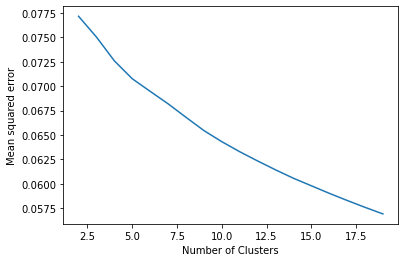

In [272]:
import matplotlib.pyplot as plt
plt.plot(range(2,20),temp2)
plt.xlabel('Number of Clusters')
plt.ylabel('Mean squared error')

In [287]:
#I guess the knee is around 5 clusters... So thats the number chose.
ncluster=5
cluster_df=frequency_neigh.drop('labels',1)
kmeans=KMeans(n_clusters=ncluster, init='k-means++',random_state=0).fit(cluster_df)
frequency_neigh['labels']=kmeans.labels_

In [288]:
# set color scheme for the clusters
x = np.arange(ncluster)
ys = [i + x + (i*x)**2 for i in range(ncluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

map_toronto = folium.Map(location=[Toronto_center.latitude, Toronto_center.longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhood_df['latitude'], neighborhood_df['longitude'], neighborhood_df['neighborhood'],frequency_neigh['labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_toronto)
       
map_toronto


In [289]:
top5['labels']=kmeans.labels_

In [294]:
top5[top5['labels']==0]

,neighborhood,1,2,3,4,5,labels
3,Baby Point,Spa,Coffee Shop,Bar,Event Space,River,0
4,Banbury,Zoo Exhibit,Farmers Market,Electronics Store,Escape Room,Ethiopian Restaurant,0
5,Bathurst Manor,Playground,Park,Men's Store,Health & Beauty Service,Baseball Field,0
7,Bayview Woods-Steeles,Sandwich Place,Bank,Zoo Exhibit,Dumpling Restaurant,Electronics Store,0
11,Birch Cliff,Café,General Entertainment,Thai Restaurant,College Stadium,Skating Rink,0
25,Clanton Park,Women's Store,Other Repair Shop,Zoo Exhibit,Farm,Eastern European Restaurant,0
62,Henry Farm,Coffee Shop,Pharmacy,Women's Store,Tennis Court,Intersection,0
70,Hunt Club,Playground,Thai Restaurant,Gas Station,Park,Photography Studio,0
78,Lansing-Westgate,Dog Run,Playground,Zoo Exhibit,Farm,Electronics Store,0
90,Markland Wood,Baseball Field,Flower Shop,Park,Bank,Discount Store,0


In [295]:
top5[top5['labels']==1]

,neighborhood,1,2,3,4,5,labels
14,Bridle Path,Zoo Exhibit,Fast Food Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,1


In [296]:
top5[top5['labels']==2]

,neighborhood,1,2,3,4,5,labels
128,Rouge (South),Zoo,Other Great Outdoors,National Park,Theme Park Ride / Attraction,Trail,2
129,Rouge (West),Zoo,Other Great Outdoors,National Park,Theme Park Ride / Attraction,Trail,2


In [297]:
top5[top5['labels']==3]

,neighborhood,1,2,3,4,5,labels
1,Agincourt,Cantonese Restaurant,Vietnamese Restaurant,Asian Restaurant,Hong Kong Restaurant,Pizza Place,3
2,Alderwood,Pizza Place,Gas Station,Pub,Skating Rink,Coffee Shop,3
9,Beechborough,Furniture / Home Store,Convenience Store,Pet Service,Shopping Mall,Sandwich Place,3
17,Cedarbrae,Pizza Place,Coffee Shop,Grocery Store,Discount Store,Pharmacy,3
23,Clairlea,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Ice Cream Shop,Sandwich Place,3
26,Clarks Corners,Intersection,Convenience Store,Shopping Mall,Bus Stop,Gas Station,3
27,Cliffcrest,Pharmacy,Bistro,Pizza Place,Liquor Store,Sandwich Place,3
28,Cliffside,Coffee Shop,Fish & Chips Shop,Grocery Store,Breakfast Spot,Sandwich Place,3
31,Crescent Town,Bank,Convenience Store,Sushi Restaurant,Supermarket,Beer Store,3
40,Don Valley Village,Coffee Shop,Pizza Place,Park,Bank,Fast Food Restaurant,3


In [298]:
top5[top5['labels']==4]

,neighborhood,1,2,3,4,5,labels
0,Adelaide,Coffee Shop,Gastropub,Restaurant,Seafood Restaurant,American Restaurant,4
6,Bayview Village,Café,Clothing Store,Bank,Restaurant,Fast Food Restaurant,4
8,Bedford Park,Pub,Restaurant,Asian Restaurant,Japanese Restaurant,Diner,4
10,Berczy Park,Coffee Shop,Cocktail Bar,Creperie,Farmers Market,Fountain,4
12,Birchmount,Men's Store,Bank,Sandwich Place,Burrito Place,Fast Food Restaurant,4
...,...,...,...,...,...,...,...
180,York Mills West,Restaurant,French Restaurant,Sandwich Place,Business Service,Park,4
181,York University,Pizza Place,Restaurant,Pub,Chinese Restaurant,Italian Restaurant,4
182,York University Heights,Restaurant,Pizza Place,Bus Stop,Gas Station,Shopping Mall,4
183,Yorkdale,Cosmetics Shop,Toy / Game Store,Bookstore,Men's Store,Furniture / Home Store,4


In [299]:
to

,neighborhood,1,2,3,4,5,labels
